In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Dictionary**

*Column Name* 	          *Description*

Person_ID 	     -->   Unique ID assigned to each person

Gender 	    -->       The gender of the person (Male/Female)

Age 	     -->        Age of the person in years

Occupation 	 -->      The occupation of the person

Sleep_duration 	 -->  The duration of sleep of the person in hours

Quality_of_sleep  -->   A subjective rating of the quality of sleep, ranging   from 1 to 10

Physical_activity --> 	The level of physical activity of the person (Low Medium/High)

Stress Level 	  -->    A subjective rating of the stress level, ranging from 1 to 10

BMI_category 	   -->     The BMI category of the person (Underweight/Normal/Overweight/Obesity)

Blood_pressure 	 -->  The blood pressure of the person in mmHg

Heart_rate 	    -->    The heart rate of the person in beats per minute

Daily Steps 	  -->   The number of steps taken by the person per day

Sleep_disorder 	  -->  The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea)

Details about Sleep Disorder Column:

*   None: The individual does not exhibit any specific sleep disorder.
*   Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
*   Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.






In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
# REading the csv file
df=pd.read_csv('/content/drive/MyDrive/Data-Science-Projects-main/Sleep Disorder Prediction/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [126]:
# null values in data
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [127]:
#unique value in each column and their data types
print("unique value counts in each column and data")
for col in df.columns:
  print(col,df[col].nunique(),df[col].dtypes)

unique value counts in each column and data
Person ID 374 int64
Gender 2 object
Age 31 int64
Occupation 11 object
Sleep Duration 27 float64
Quality of Sleep 6 int64
Physical Activity Level 16 int64
Stress Level 6 int64
BMI Category 4 object
Blood Pressure 25 object
Heart Rate 19 int64
Daily Steps 20 int64
Sleep Disorder 3 object


In [128]:
for col in df.columns:
  if df[col].dtypes=='object':
    print(col,'--->',df[col].value_counts())

Gender ---> Male      189
Female    185
Name: Gender, dtype: int64
Occupation ---> Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64
BMI Category ---> Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64
Blood Pressure ---> 130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: Blood Pressure, dtype: int64
Sleep Disorder ---> None           219
Sleep Apnea     78
Insomnia        

In [129]:
#spliting the blood pressure into two columns
df['systolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0])
df['diastolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1])
#droping the blood pressure column
df.drop('Blood Pressure', axis=1, inplace=True)

In [130]:
# replacing normal weight to normal
df['BMI Category']=df['BMI Category'].replace('Normal Weight','Normal')
df['BMI Category'].value_counts()

Normal        216
Overweight    148
Obese          10
Name: BMI Category, dtype: int64

<Axes: xlabel='Occupation', ylabel='count'>

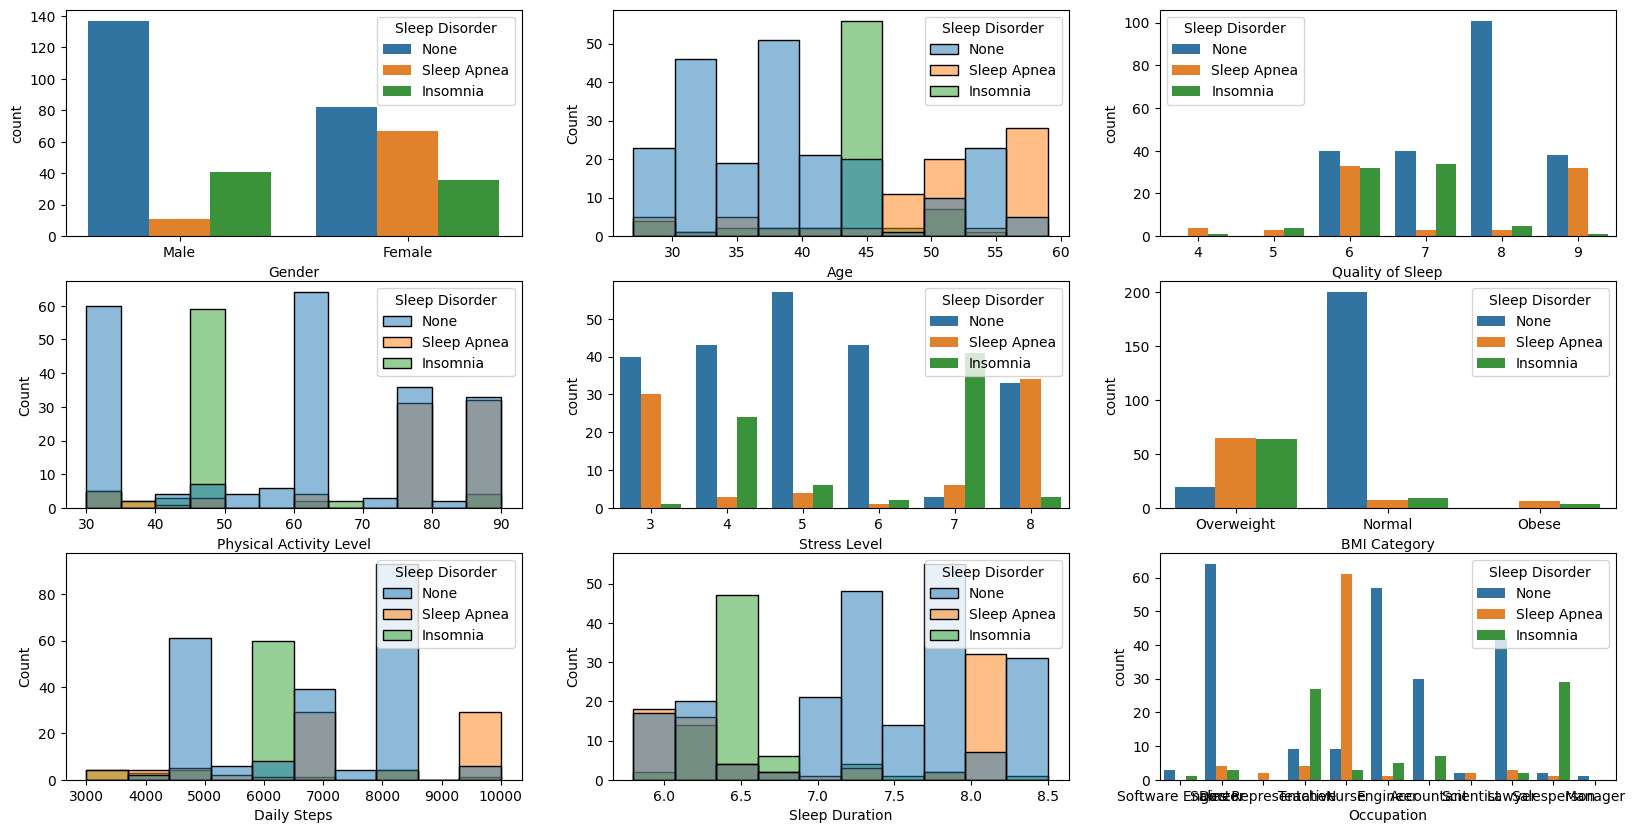

In [131]:
fig,ax = plt.subplots(3,3,figsize=(20,10))
sns.countplot(x = 'Gender', data = df,hue='Sleep Disorder', ax = ax[0,0])
sns.histplot(x = 'Age', data = df,hue='Sleep Disorder', ax = ax[0,1], bins = 10)
sns.countplot(x = 'Quality of Sleep', data = df,hue='Sleep Disorder', ax = ax[0,2])
sns.histplot(x = 'Physical Activity Level', data = df,hue='Sleep Disorder', ax = ax[1,0], bins = 12)
sns.countplot(x = 'Stress Level', data = df,hue='Sleep Disorder', ax = ax[1,1])
sns.countplot(x = 'BMI Category', data = df,hue='Sleep Disorder', ax = ax[1,2])
sns.histplot(x = 'Daily Steps', data = df,hue='Sleep Disorder', ax = ax[2,0], bins = 10)
sns.histplot(x = 'Sleep Duration', data = df,hue='Sleep Disorder',ax = ax[2,1], bins = 10)
sns.countplot(x = 'Occupation', data = df,hue='Sleep Disorder', ax = ax[2,2])

 ### From the above plots:


    The majority of both males and females experience improved sleep. However, females are more likely to suffer from sleep apnea and insomnia compared to males.

    Individuals aged over 45 are more susceptible to insomnia and sleep apnea.

    Having a sleep quality score greater than 5 indicates better sleep.

    Overweight individuals are more prone to sleep apnea and insomnia, followed by obese individuals.

    Occupation has a significant impact on sleep disorders. Nurses are more susceptible to sleep apnea, while salespersons are more affected by insomnia, followed by teachers. Some occupations are less affected by sleep apnea and insomnia, and individuals in those professions tend to have better sleep.













# Label Encoding

In [132]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [133]:
cat_col = ['Gender', 'Occupation','BMI Category','Sleep Disorder']
for col in cat_col:
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])
    print(col,':' ,df[col].unique())

Gender : [1 0]
Occupation : [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category : [2 0 1]
Sleep Disorder : [1 2 0]


# Correlation Matrix Heatmap

<Axes: >

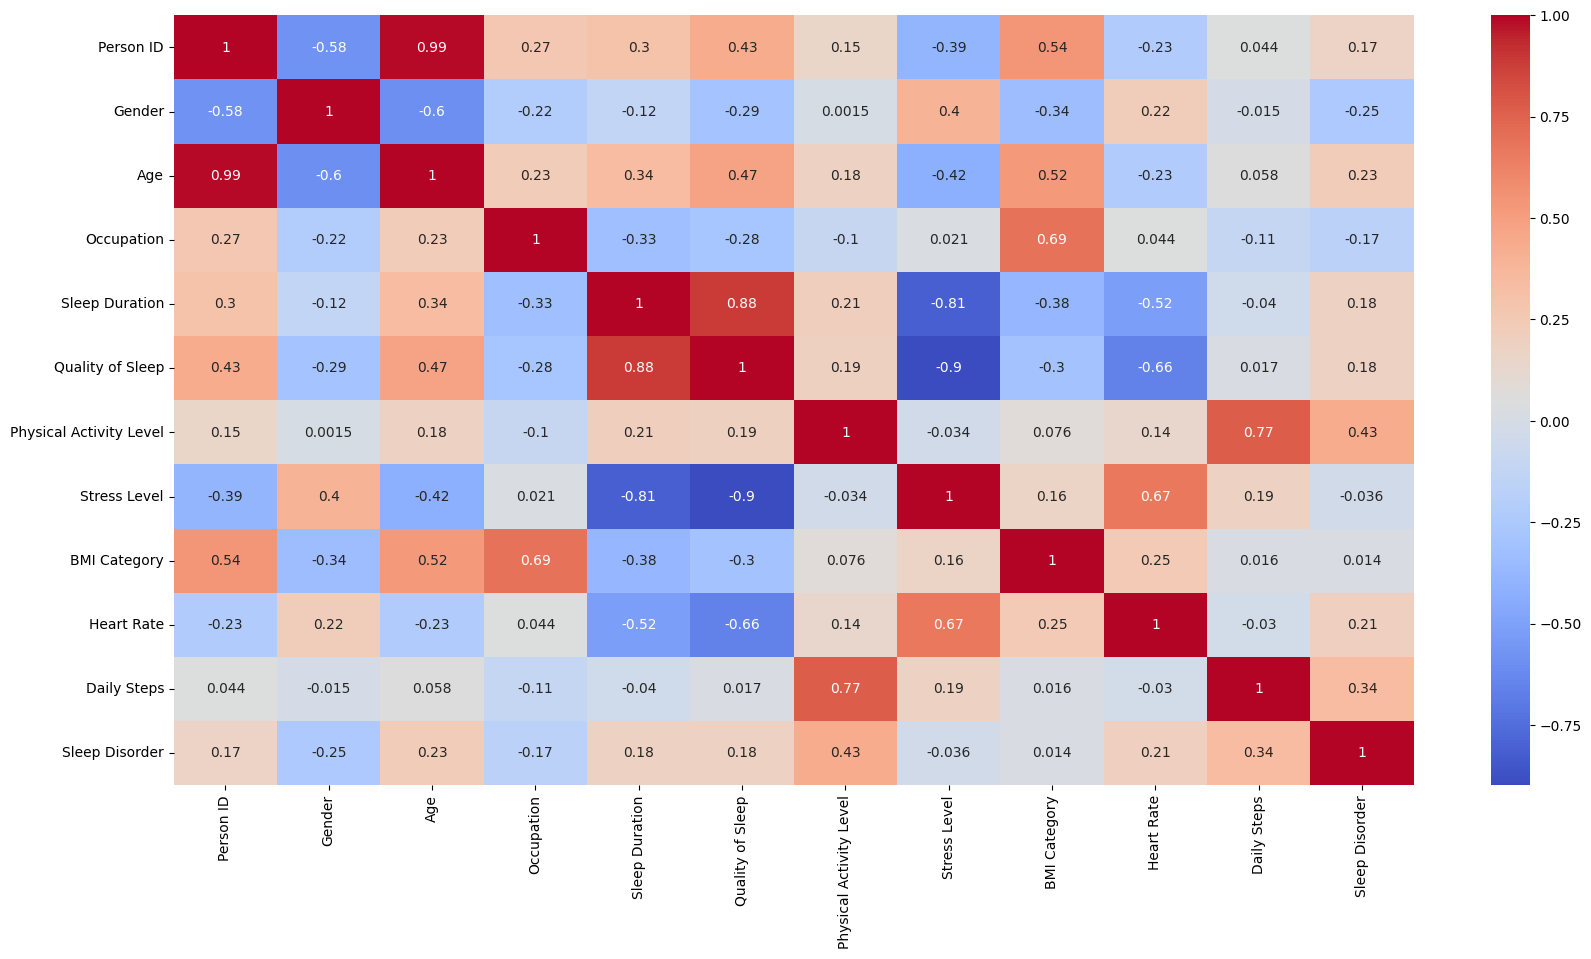

In [134]:
#Correlation Matrix Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [135]:
x=df.drop('Sleep Disorder',axis=1)
y=df['Sleep Disorder']

# Train Test Split

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Model Building

# Logistic Regression Model

In [137]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [138]:
y_pred_lr = lr.predict(X_test)

In [139]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.72


In [140]:
confusion = confusion_matrix(y_test, y_pred_lr)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[14 10  0]
 [12 49  1]
 [ 2  7 18]]


In [141]:
report = classification_report(y_test, y_pred_lr)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.58      0.54        24
           1       0.74      0.79      0.77        62
           2       0.95      0.67      0.78        27

    accuracy                           0.72       113
   macro avg       0.73      0.68      0.70       113
weighted avg       0.74      0.72      0.72       113



In [142]:
coef = lr.coef_[0]
intercept = lr.intercept_
print('coefficents :',coef)
print('Intercept :',intercept)

coefficents : [ 4.26453929e-04  1.50178573e-03 -2.16388203e-02  4.60409842e-02
 -1.31022948e-02 -1.72656170e-02 -6.97744786e-02  1.25310391e-02
  1.41443537e-02 -1.80793875e-02  5.82485468e-05  2.47718815e-02
  2.54675352e-02]
Intercept : [-0.00023481  0.00133027 -0.00109546]


 # Decision Tree Classifier

In [177]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [178]:
from sklearn.model_selection import GridSearchCV

In [179]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30,40,50],
    'min_samples_split': [2, 5, 10,15,18],
    'min_samples_leaf': [1, 2, 4,8,16]
}

In [180]:
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4, 8, 16],
                         'min_samples_split': [2, 5, 10, 15, 18]})

In [181]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [182]:
best_dt_classifier = grid_search.best_estimator_
y_pred_dt = best_dt_classifier.predict(X_test)

In [183]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)



Accuracy: 0.9203539823008849


In [184]:
confusion = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[21  2  1]
 [ 0 62  0]
 [ 4  2 21]]


In [185]:
classification_rep = classification_report(y_test, y_pred_dt)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        24
           1       0.94      1.00      0.97        62
           2       0.95      0.78      0.86        27

    accuracy                           0.92       113
   macro avg       0.91      0.88      0.89       113
weighted avg       0.92      0.92      0.92       113



# Randomforest Classifier

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [169]:
rfc = RandomForestClassifier(n_estimators=100,random_state=38)

In [154]:
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20, 30,40,50],
#     'min_samples_split': [2, 5, 10,15,20],
#     'min_samples_leaf': [1, 2, 4,8,16],
#     'bootstrap': [True, False]
# }

In [155]:
import warnings
warnings.filterwarnings('ignore')

In [156]:
# # Create GridSearchCV object
# grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
# # Fit the model to find the best hyperparameters
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

In [157]:
# Use the best model for prediction
# best_rf_classifier = grid_search.best_estimator_
# y_pred_rfc = best_rf_classifier.predict(X_test)

In [170]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=38)

In [171]:
y_pred_rfc = rfc.predict(X_test)

In [172]:
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy:", accuracy)

Accuracy: 0.9026548672566371


In [173]:
confusion = confusion_matrix(y_test, y_pred_rfc)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[21  1  2]
 [ 1 61  0]
 [ 5  2 20]]


In [174]:
classification_rep = classification_report(y_test, y_pred_rfc)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.95      0.98      0.97        62
           2       0.91      0.74      0.82        27

    accuracy                           0.90       113
   macro avg       0.88      0.87      0.87       113
weighted avg       0.91      0.90      0.90       113



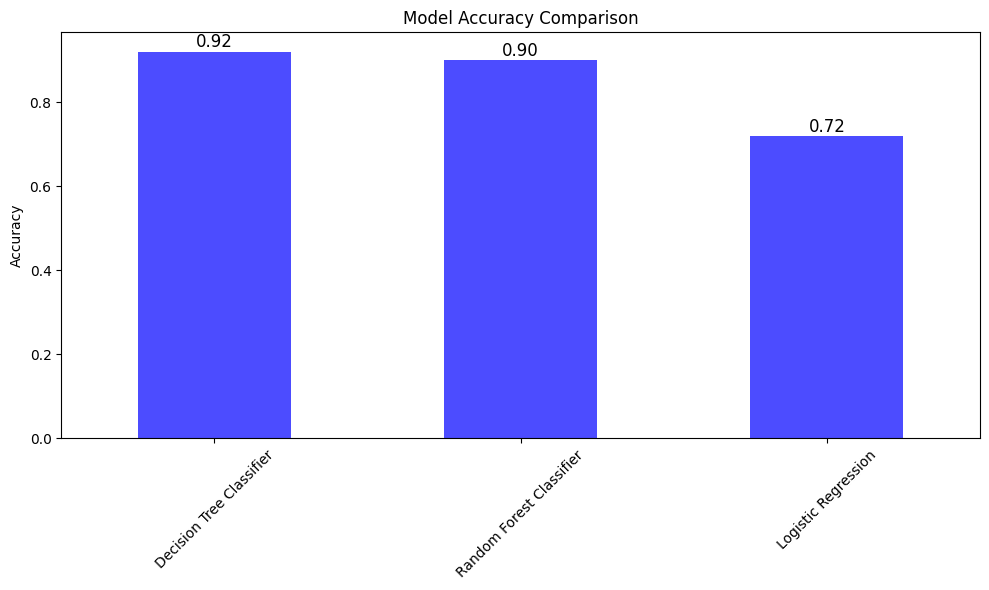

In [186]:
# Create a dictionary of model names and their accuracy scores
model_accuracies = {
    'Logistic Regression':0.72,
    'Decision Tree Classifier':0.92,
    'Random Forest Classifier': 0.90
    # Add more models and their accuracy scores as needed
}

# Convert the dictionary into a pandas DataFrame
accuracy_df = pd.DataFrame.from_dict(model_accuracies, orient='index', columns=['Accuracy'])

# Sort the DataFrame by accuracy in descending order for better visualization
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Create a bar plot to compare model accuracies
ax = accuracy_df.plot(kind='bar', legend=False, figsize=(10, 6), color='blue', alpha=0.7)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Add accuracy values on top of the bars for better readability
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height() + 0.01),
                ha='center', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Decision Tree Feature Importance

In [187]:
feature_importances_dt = best_dt_classifier.feature_importances_
feature_names = X_train.columns  # Assuming X is your DataFrame with feature columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_dt})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df.reset_index(drop=True)

,Feature,Importance
0,BMI Category,0.379250
1,Physical Activity Level,0.196285
2,Person ID,0.152270
3,Age,0.099129
4,systolic_bp,0.076455
5,Heart Rate,0.037720
6,Sleep Duration,0.023238
7,Occupation,0.016008
8,Gender,0.011759
9,Quality of Sleep,0.007887


# Conclusion

From the EDA, I have concluded that the sleep orders depends upon three main factors that are gender, occupation and BMI of the patient. The males have more instance of Insomia whereas femlaes have more instances of Sleep Apnea. In addition the that people with occupation such as nurses are more prone to sleep disorders. The BMI of the patient also plays a vital role in the prediction of sleep disorders. The patients who are either Obese or overweight are more prone to sleep disorders.

Coming to the classfication models, both the models performed pretty good, however the Decision Tree Classifier using grid searchcv have excellent results with 92% accuracy.